In [1]:
import pandas as pd
from soil_fertility.components.data_ingestion import DataIngestion
from soil_fertility.components.data_transformation.data_transformation_part3 import DataTransformationThree
import warnings
warnings.filterwarnings('ignore')
from soil_fertility.components.models import MyApriori

In [2]:
data_path= "/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/data/Dataset3.xlsx"

In [3]:
obj = DataIngestion()
part,train_path,test_path= obj.init_ingestion(
    data_path,
    option="xlsx"
)



In [4]:
tranformation_obj = DataTransformationThree()
part,preprocessor,raw_data_path = tranformation_obj.transform(
    train_path,test_path,numerical_features=["Temperature","Humidity","Rainfall"],k=5,strategie="frequency"
)

In [5]:
df = pd.read_csv(raw_data_path)

In [6]:
df.head(200)

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,T4,H5,R1,laterite,Coconut,Urea
1,T5,H4,R1,coastal,Coconut,Good NPK
2,T3,H4,R1,alluvial,Coconut,DAP
3,T3,H4,R1,alluvial,Coconut,Urea
4,T3,H5,R1,coastal,Coconut,MOP
...,...,...,...,...,...,...
195,T4,H5,R4,coastal,Coconut,Good NPK
196,T5,H4,R4,alluvial,Coconut,MOP
197,T5,H4,R4,alluvial,Coconut,DAP
198,T4,H1,R4,clay loam,rice,MOP


In [7]:
df['Temperature'].value_counts()

Temperature
T4    59
T5    59
T3    59
T2    59
T1    59
Name: count, dtype: int64

In [8]:
tranformation_obj = DataTransformationThree()
part,preprocessor,raw_data_path = tranformation_obj.transform(
    train_path,test_path,numerical_features=["Temperature","Humidity","Rainfall"],k=5,strategie="width"
)

In [9]:
df = pd.read_csv(raw_data_path)

In [10]:
df.head(10)

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,T4,H4,R1,laterite,Coconut,Urea
1,T5,H4,R1,coastal,Coconut,Good NPK
2,T3,H4,R1,alluvial,Coconut,DAP
3,T3,H4,R1,alluvial,Coconut,Urea
4,T4,H5,R1,coastal,Coconut,MOP
5,T5,H3,R1,alluvial,Coconut,Urea
6,T5,H3,R1,alluvial,Coconut,DAP
7,T4,H3,R1,sandy,Coconut,Urea
8,T4,H3,R1,sandy,Coconut,DAP
9,T5,H4,R1,sandy,Coconut,DAP


In [11]:
df.shape

(295, 6)

In [12]:
df['Temperature'].value_counts()

Temperature
T4    86
T3    70
T5    58
T2    44
T1    37
Name: count, dtype: int64

In [25]:
aprio=MyApriori(0.8,0.8)

aprio.fit(df,transaction_columns=['Crop','Soil','Fertilizer'],items_groups=['Temperature','Humidity','Rainfall'])
rules=aprio.get_rules()


In [26]:
rules

,Antecedent,Consequent,Confidence,Cosine,Lift,All Confidence,Jaccard,Kulczynski,Max Confidence
0,(T4),(R2),0.958333,0.978945,1.125000,0.958333,0.958333,0.979167,1.043478
1,(R3),(T3),0.958333,0.978945,1.125000,0.958333,0.958333,0.979167,1.043478
2,(T3),(R3),0.958333,0.978945,1.125000,0.958333,0.958333,0.979167,1.043478
3,(R3),(R2),0.958333,0.978945,1.125000,0.958333,0.958333,0.979167,1.043478
4,(T3),(R2),0.958333,0.978945,1.125000,0.958333,0.958333,0.979167,1.043478
5,(T4),(R3),0.916667,0.957427,1.125000,0.916667,0.916667,0.958333,1.090909
6,(R3),(T4),0.916667,0.957427,1.125000,0.916667,0.916667,0.958333,1.090909
7,(R2),(T4),0.884615,0.940540,1.038462,0.884615,0.884615,0.942308,1.130435
8,(R2),(R3),0.884615,0.940540,1.038462,0.884615,0.884615,0.942308,1.130435
9,(R2),(T3),0.884615,0.940540,1.038462,0.884615,0.884615,0.942308,1.130435


In [29]:
rules.describe()

,Confidence,Cosine,Lift,All Confidence,Jaccard,Kulczynski,Max Confidence
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.927885,0.963120,1.099038,0.927885,0.927885,0.963942,1.079051
std,0.034163,0.017784,0.041802,0.034163,0.034163,0.017081,0.040179
min,0.884615,0.940540,1.038462,0.884615,0.884615,0.942308,1.043478
25%,0.892628,0.944762,1.060096,0.892628,0.892628,0.946314,1.043478
50%,0.937500,0.968186,1.125000,0.937500,0.937500,0.968750,1.067194
75%,0.958333,0.978945,1.125000,0.958333,0.958333,0.979167,1.120553
max,0.958333,0.978945,1.125000,0.958333,0.958333,0.979167,1.130435


In [18]:

supports=[0.5,0.6,0.7,0.8,0.9]
confidences=[0.5,0.6,0.7,0.8,0.9]
len_rules=[]
for supp in supports:
    for conf in confidences:
        aprio.set_parameters(supp,conf)
        aprio.fit(df,transaction_columns=['Crop','Soil','Fertilizer'],items_groups=['Temperature','Humidity','Rainfall'])
        rules=aprio.get_rules()
        len_rules.append(len(rules))
        print("support: ",supp," confidence: ",conf," len rules: ",len(rules))
        

support:  0.5  confidence:  0.5  len rules:  4032
support:  0.5  confidence:  0.6  len rules:  3817
support:  0.5  confidence:  0.7  len rules:  3382
support:  0.5  confidence:  0.8  len rules:  2801
support:  0.5  confidence:  0.9  len rules:  1922
support:  0.6  confidence:  0.5  len rules:  300
support:  0.6  confidence:  0.6  len rules:  300
support:  0.6  confidence:  0.7  len rules:  289
support:  0.6  confidence:  0.8  len rules:  208
support:  0.6  confidence:  0.9  len rules:  131
support:  0.7  confidence:  0.5  len rules:  78
support:  0.7  confidence:  0.6  len rules:  78
support:  0.7  confidence:  0.7  len rules:  78
support:  0.7  confidence:  0.8  len rules:  64
support:  0.7  confidence:  0.9  len rules:  40
support:  0.8  confidence:  0.5  len rules:  10
support:  0.8  confidence:  0.6  len rules:  10
support:  0.8  confidence:  0.7  len rules:  10
support:  0.8  confidence:  0.8  len rules:  10
support:  0.8  confidence:  0.9  len rules:  7
support:  0.9  confidence:

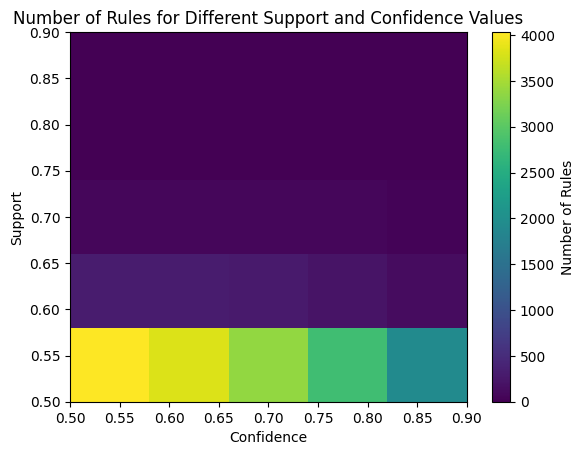

In [20]:
import matplotlib.pyplot as plt
len_rules_2d = [len_rules[i:i + len(confidences)] for i in range(0, len(len_rules), len(confidences))]

plt.imshow(len_rules_2d, cmap='viridis', extent=[min(confidences), max(confidences), min(supports), max(supports)],
           aspect='auto', origin='lower')
plt.colorbar(label='Number of Rules')
plt.xlabel('Confidence')
plt.ylabel('Support')
plt.title('Number of Rules for Different Support and Confidence Values')
plt.show()

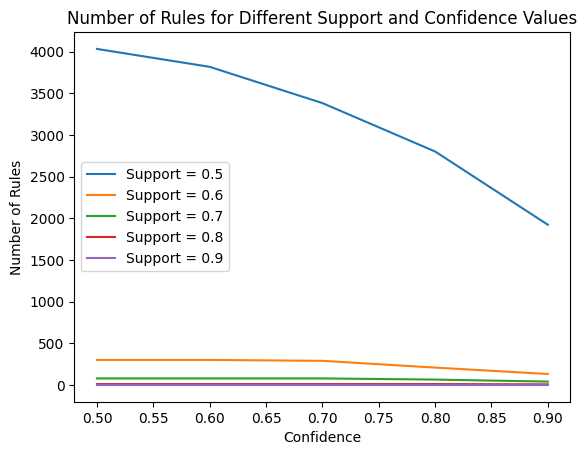

In [22]:
import matplotlib.pyplot as plt

supports = [0.5, 0.6, 0.7, 0.8, 0.9]
confidences = [0.5, 0.6, 0.7, 0.8, 0.9]

for supp in supports:
    len_rules = []  
    for conf in confidences:
        aprio.set_parameters(supp, conf)
        aprio.fit(df, transaction_columns=['Crop', 'Soil', 'Fertilizer'], items_groups=['Temperature', 'Humidity', 'Rainfall'])
        rules = aprio.get_rules()
        len_rules.append(len(rules))

    plt.plot(confidences, len_rules, label=f'Support = {supp}')

plt.xlabel('Confidence')
plt.ylabel('Number of Rules')
plt.title('Number of Rules for Different Support and Confidence Values')
plt.legend()
plt.show()


In [32]:
prediction_result = aprio.predict(items=['T4'], metric='confidence')
print(prediction_result)


[(frozenset({'R2'}), 0.9583333333333334), (frozenset({'R3'}), 0.9166666666666666)]


In [33]:
prediction_result = aprio.predict(items=['T4'], metric='cosine')
print(prediction_result)


[(frozenset({'R2'}), 0.978945010372561), (frozenset({'R3'}), 0.9574271077563381)]
